In [1]:
# Credits: https://github.com/SullyChen/Autopilot-TensorFlow
# Research paper: End to End Learning for Self-Driving Cars by Nvidia. [https://arxiv.org/pdf/1604.07316.pdf]

# NVidia dataset: 72 hrs of video => 72*60*60*30 = 7,776,000 images
# Nvidia blog: https://devblogs.nvidia.com/deep-learning-self-driving-cars/


# Our Dataset: https://github.com/SullyChen/Autopilot-TensorFlow [https://drive.google.com/file/d/0B-KJCaaF7elleG1RbzVPZWV4Tlk/view]
# Size: 25 minutes = 25*60*30 = 45,000 images ~ 2.3 GB


# If you want to try on a slightly large dataset: 70 minutes of data ~ 223GB
# Refer: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5
# Format: Image, latitude, longitude, gear, brake, throttle, steering angles and speed



# Additional Installations:
# pip3 install h5py


# AWS: https://aws.amazon.com/blogs/machine-learning/get-started-with-deep-learning-using-the-aws-deep-learning-ami/

# Youtube:https://www.youtube.com/watch?v=qhUvQiKec2U
# Further reading and extensions: https://medium.com/udacity/teaching-a-machine-to-steer-a-car-d73217f2492c
# More data: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5

# Train Test Split (70:30)

In [17]:
# read images and steering angles from driving_dataset folder

from __future__ import division

import os
import numpy as np
import random

from scipy import pi
from itertools import islice



DATA_FOLDER = './driving_dataset/' # change this to your folder
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')


split =0.7
X = []
y = []
with open(TRAIN_FILE) as fp:
    for line in fp:
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )
        

y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.7)

train_y = y[:split_index]
test_y = y[split_index:]

Completed processing data.txt


In [18]:
len(X)

45406

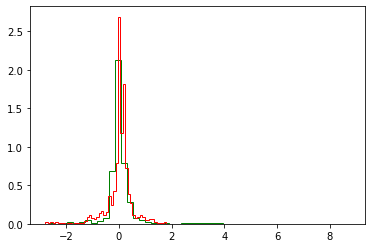

In [19]:
import numpy;

# PDF of train and test 'y' values. 
import matplotlib.pyplot as plt 
plt.hist(train_y, bins=50, normed=1, color='green', histtype ='step');
plt.hist(test_y, bins=50, normed=1, color='red', histtype ='step');
plt.show()




In [4]:
#Model 0: Base line Model: y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )


Test_MSE(MEAN):0.241561
Test_MSE(ZERO):0.241107


In [11]:
%%time
a=0
print(a)

0
Wall time: 0 ns


In [15]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Time start = 11:30 AM 29/9/2019

# Building the model with
* AdamOptimizer(1e-4)
* DropOut/keep_prob: 0.5
* Activation Function = tf.multiply((tf.matmul(h_fc4_drop, W_fc5) + b_fc5), 2)

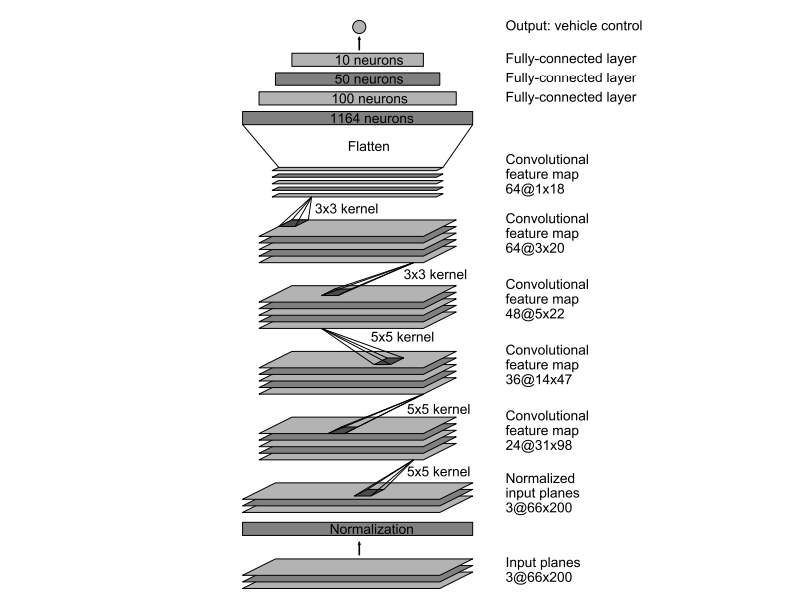

In [16]:
%%time
import tensorflow as tf
from tensorflow.core.protobuf import saver_pb2
import driving_data
import model


LOGDIR = './My Final Save'

sess = tf.InteractiveSession()


L2NormConst = 0.001

train_vars = tf.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(model.y_, model.y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
sess.run(tf.initialize_all_variables())

# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op =  tf.summary.merge_all()

saver = tf.train.Saver(write_version = saver_pb2.SaverDef.V1)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 30 times
for epoch in range(epochs):
  for i in range(int(driving_data.num_images/batch_size)):
    xs, ys = driving_data.LoadTrainBatch(batch_size)
    train_step.run(feed_dict={model.x: xs, model.y_: ys, model.keep_prob: 0.5})
    if i % 10 == 0:
      xs, ys = driving_data.LoadValBatch(batch_size)
      loss_value = loss.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
      print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))

    # write logs at every iteration
    summary = merged_summary_op.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
    summary_writer.add_summary(summary, epoch * driving_data.num_images/batch_size + i)

    if i % batch_size == 0:
      if not os.path.exists(LOGDIR):
        os.makedirs(LOGDIR)
      checkpoint_path = os.path.join(LOGDIR, "model.ckpt")
      filename = saver.save(sess, checkpoint_path)
  print("Model saved in file: %s" % filename)
print("----------->****Shritam Kumar Mund****<------------------")
print("Visit https://ishritam.ml for more detail about me.")
print("Run the command line:\n" \
          "--> tensorboard --logdir=./logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")


Epoch: 0, Step: 0, Loss: 6.37084


Epoch: 0, Step: 10, Loss: 6.11595
Epoch: 0, Step: 20, Loss: 6.14105
Epoch: 0, Step: 30, Loss: 6.2708
Epoch: 0, Step: 40, Loss: 7.09565
Epoch: 0, Step: 50, Loss: 7.81403
Epoch: 0, Step: 60, Loss: 6.2231
Epoch: 0, Step: 70, Loss: 5.90137
Epoch: 0, Step: 80, Loss: 5.85135
Epoch: 0, Step: 90, Loss: 5.83624
Epoch: 0, Step: 100, Loss: 5.78451


Epoch: 0, Step: 110, Loss: 5.77109
Epoch: 0, Step: 120, Loss: 5.80771
Epoch: 0, Step: 130, Loss: 5.76183
Epoch: 0, Step: 140, Loss: 5.65927
Epoch: 0, Step: 150, Loss: 5.6237
Epoch: 0, Step: 160, Loss: 5.88688
Epoch: 0, Step: 170, Loss: 5.54044
Epoch: 0, Step: 180, Loss: 5.57896
Epoch: 0, Step: 190, Loss: 5.44581
Epoch: 0, Step: 200, Loss: 5.41327


Epoch: 0, Step: 210, Loss: 5.38239
Epoch: 0, Step: 220, Loss: 5.35072
Epoch: 0, Step: 230, Loss: 5.31809
Epoch: 0, Step: 240, Loss: 10.5317
Epoch: 0, Step: 250, Loss: 6.23945
Epoch: 0, Step: 260, Loss: 5.23777
Epoch: 0, Step: 270, Loss: 5.20718
Epoch: 0, Step: 280, Loss: 5.17268
Epoch: 0, Step: 290, Loss: 5.14597
Epoch: 0, Step: 300, Loss: 5.12325


Epoch: 0, Step: 310, Loss: 5.11927
Epoch: 0, Step: 320, Loss: 5.09066
Epoch: 0, Step: 330, Loss: 5.06576
Epoch: 0, Step: 340, Loss: 5.04417
Epoch: 0, Step: 350, Loss: 5.02182
Epoch: 0, Step: 360, Loss: 4.97056
Epoch: 0, Step: 370, Loss: 4.94594
Epoch: 0, Step: 380, Loss: 4.92501
Epoch: 0, Step: 390, Loss: 4.92552
Epoch: 0, Step: 400, Loss: 4.89127


Epoch: 0, Step: 410, Loss: 4.88197
Epoch: 0, Step: 420, Loss: 4.85091
Epoch: 0, Step: 430, Loss: 4.82742
Epoch: 0, Step: 440, Loss: 4.81797
Epoch: 0, Step: 450, Loss: 4.78292
Model saved in file: ./My Final Save\model.ckpt
Epoch: 1, Step: 100, Loss: 4.7758


Epoch: 1, Step: 110, Loss: 4.76204
Epoch: 1, Step: 120, Loss: 4.73631
Epoch: 1, Step: 130, Loss: 4.71602
Epoch: 1, Step: 140, Loss: 4.69446
Epoch: 1, Step: 150, Loss: 4.67519
Epoch: 1, Step: 160, Loss: 4.65394
Epoch: 1, Step: 170, Loss: 4.63893
Epoch: 1, Step: 180, Loss: 4.67447
Epoch: 1, Step: 190, Loss: 4.96305
Epoch: 1, Step: 200, Loss: 10.2035


Epoch: 1, Step: 210, Loss: 4.58247
Epoch: 1, Step: 220, Loss: 4.53415
Epoch: 1, Step: 230, Loss: 4.51543
Epoch: 1, Step: 240, Loss: 4.50149
Epoch: 1, Step: 250, Loss: 4.48792
Epoch: 1, Step: 260, Loss: 4.46257
Epoch: 1, Step: 270, Loss: 4.64011
Epoch: 1, Step: 280, Loss: 4.48407
Epoch: 1, Step: 290, Loss: 4.39964
Epoch: 1, Step: 300, Loss: 4.47012


Epoch: 1, Step: 310, Loss: 4.35921
Epoch: 1, Step: 320, Loss: 4.38423
Epoch: 1, Step: 330, Loss: 4.35039
Epoch: 1, Step: 340, Loss: 4.37408
Epoch: 1, Step: 350, Loss: 4.38083
Epoch: 1, Step: 360, Loss: 4.48986
Epoch: 1, Step: 370, Loss: 4.34719
Epoch: 1, Step: 380, Loss: 4.24711
Epoch: 1, Step: 390, Loss: 4.22597
Epoch: 1, Step: 400, Loss: 4.20974


Epoch: 1, Step: 410, Loss: 4.19452
Epoch: 1, Step: 420, Loss: 4.17959
Epoch: 1, Step: 430, Loss: 4.16453
Epoch: 1, Step: 440, Loss: 4.14987
Epoch: 1, Step: 450, Loss: 4.13798
Epoch: 1, Step: 460, Loss: 4.12286
Epoch: 1, Step: 470, Loss: 4.11054
Epoch: 1, Step: 480, Loss: 4.10459
Epoch: 1, Step: 490, Loss: 4.08271
Epoch: 1, Step: 500, Loss: 4.09618


Epoch: 1, Step: 510, Loss: 4.06593
Epoch: 1, Step: 520, Loss: 4.31095
Epoch: 1, Step: 530, Loss: 4.483
Epoch: 1, Step: 540, Loss: 4.14458
Epoch: 1, Step: 550, Loss: 4.01557
Model saved in file: ./My Final Save\model.ckpt
Epoch: 2, Step: 200, Loss: 4.00063


Epoch: 2, Step: 210, Loss: 4.02436
Epoch: 2, Step: 220, Loss: 4.17637
Epoch: 2, Step: 230, Loss: 5.22436
Epoch: 2, Step: 240, Loss: 5.50895
Epoch: 2, Step: 250, Loss: 4.02102
Epoch: 2, Step: 260, Loss: 3.974
Epoch: 2, Step: 270, Loss: 3.90451
Epoch: 2, Step: 280, Loss: 3.90831
Epoch: 2, Step: 290, Loss: 3.88463
Epoch: 2, Step: 300, Loss: 3.90284


Epoch: 2, Step: 310, Loss: 3.93953
Epoch: 2, Step: 320, Loss: 3.88941
Epoch: 2, Step: 330, Loss: 3.84508
Epoch: 2, Step: 340, Loss: 3.88601
Epoch: 2, Step: 350, Loss: 4.167
Epoch: 2, Step: 360, Loss: 3.87312
Epoch: 2, Step: 370, Loss: 3.84904
Epoch: 2, Step: 380, Loss: 3.76265
Epoch: 2, Step: 390, Loss: 3.75134
Epoch: 2, Step: 400, Loss: 3.73967


Epoch: 2, Step: 410, Loss: 3.72865
Epoch: 2, Step: 420, Loss: 3.79032
Epoch: 2, Step: 430, Loss: 9.39916
Epoch: 2, Step: 440, Loss: 3.93618
Epoch: 2, Step: 450, Loss: 3.69372
Epoch: 2, Step: 460, Loss: 3.67735
Epoch: 2, Step: 470, Loss: 3.66314
Epoch: 2, Step: 480, Loss: 3.65861
Epoch: 2, Step: 490, Loss: 3.64431
Epoch: 2, Step: 500, Loss: 3.65166


Epoch: 2, Step: 510, Loss: 3.63672
Epoch: 2, Step: 520, Loss: 3.62467
Epoch: 2, Step: 530, Loss: 3.61589
Epoch: 2, Step: 540, Loss: 3.60748
Epoch: 2, Step: 550, Loss: 3.5868
Epoch: 2, Step: 560, Loss: 3.58389
Epoch: 2, Step: 570, Loss: 3.57103
Epoch: 2, Step: 580, Loss: 3.56291
Epoch: 2, Step: 590, Loss: 3.54683
Epoch: 2, Step: 600, Loss: 3.54342


Epoch: 2, Step: 610, Loss: 3.52926
Epoch: 2, Step: 620, Loss: 3.51795
Epoch: 2, Step: 630, Loss: 3.51396
Epoch: 2, Step: 640, Loss: 3.49714
Epoch: 2, Step: 650, Loss: 3.49115
Model saved in file: ./My Final Save\model.ckpt
Epoch: 3, Step: 300, Loss: 3.49003


Epoch: 3, Step: 310, Loss: 3.47809
Epoch: 3, Step: 320, Loss: 3.46797
Epoch: 3, Step: 330, Loss: 3.46099
Epoch: 3, Step: 340, Loss: 3.44853
Epoch: 3, Step: 350, Loss: 3.44112
Epoch: 3, Step: 360, Loss: 3.44166
Epoch: 3, Step: 370, Loss: 3.47855
Epoch: 3, Step: 380, Loss: 5.04106
Epoch: 3, Step: 390, Loss: 7.65887
Epoch: 3, Step: 400, Loss: 3.4126


Epoch: 3, Step: 410, Loss: 3.39008
Epoch: 3, Step: 420, Loss: 3.388
Epoch: 3, Step: 430, Loss: 3.38408
Epoch: 3, Step: 440, Loss: 3.37873
Epoch: 3, Step: 450, Loss: 3.39067
Epoch: 3, Step: 460, Loss: 3.54021
Epoch: 3, Step: 470, Loss: 3.35296
Epoch: 3, Step: 480, Loss: 3.34289
Epoch: 3, Step: 490, Loss: 3.37884
Epoch: 3, Step: 500, Loss: 3.30682


Epoch: 3, Step: 510, Loss: 3.32663
Epoch: 3, Step: 520, Loss: 3.32369
Epoch: 3, Step: 530, Loss: 3.33835
Epoch: 3, Step: 540, Loss: 3.38541
Epoch: 3, Step: 550, Loss: 3.4547
Epoch: 3, Step: 560, Loss: 3.28637
Epoch: 3, Step: 570, Loss: 3.251
Epoch: 3, Step: 580, Loss: 3.23511
Epoch: 3, Step: 590, Loss: 3.2259
Epoch: 3, Step: 600, Loss: 3.21801


Epoch: 3, Step: 610, Loss: 3.20991
Epoch: 3, Step: 620, Loss: 3.20211
Epoch: 3, Step: 630, Loss: 3.19437
Epoch: 3, Step: 640, Loss: 3.19427
Epoch: 3, Step: 650, Loss: 3.18196
Epoch: 3, Step: 660, Loss: 3.17856
Epoch: 3, Step: 670, Loss: 3.16733
Epoch: 3, Step: 680, Loss: 3.16535
Epoch: 3, Step: 690, Loss: 3.20174
Epoch: 3, Step: 700, Loss: 3.14627


Epoch: 3, Step: 710, Loss: 3.55113
Epoch: 3, Step: 720, Loss: 3.61219
Epoch: 3, Step: 730, Loss: 3.24452
Epoch: 3, Step: 740, Loss: 3.12369
Epoch: 3, Step: 750, Loss: 3.11655
Model saved in file: ./My Final Save\model.ckpt
Epoch: 4, Step: 400, Loss: 3.14501


Epoch: 4, Step: 410, Loss: 3.3541
Epoch: 4, Step: 420, Loss: 4.55856
Epoch: 4, Step: 430, Loss: 4.26245
Epoch: 4, Step: 440, Loss: 3.11018
Epoch: 4, Step: 450, Loss: 3.10959
Epoch: 4, Step: 460, Loss: 3.06244
Epoch: 4, Step: 470, Loss: 3.06298
Epoch: 4, Step: 480, Loss: 3.04962
Epoch: 4, Step: 490, Loss: 3.08276
Epoch: 4, Step: 500, Loss: 3.12655


Epoch: 4, Step: 510, Loss: 3.03437
Epoch: 4, Step: 520, Loss: 3.034
Epoch: 4, Step: 530, Loss: 3.10362
Epoch: 4, Step: 540, Loss: 3.34413
Epoch: 4, Step: 550, Loss: 3.15807
Epoch: 4, Step: 560, Loss: 2.98772
Epoch: 4, Step: 570, Loss: 2.97493
Epoch: 4, Step: 580, Loss: 2.96814
Epoch: 4, Step: 590, Loss: 2.96125
Epoch: 4, Step: 600, Loss: 2.95375


Epoch: 4, Step: 610, Loss: 3.47057
Epoch: 4, Step: 620, Loss: 8.16451
Epoch: 4, Step: 630, Loss: 2.99238
Epoch: 4, Step: 640, Loss: 2.93132
Epoch: 4, Step: 650, Loss: 2.91977
Epoch: 4, Step: 660, Loss: 2.91356
Epoch: 4, Step: 670, Loss: 2.90958
Epoch: 4, Step: 680, Loss: 2.90087
Epoch: 4, Step: 690, Loss: 2.904
Epoch: 4, Step: 700, Loss: 2.89383


Epoch: 4, Step: 710, Loss: 2.8879
Epoch: 4, Step: 720, Loss: 2.88031
Epoch: 4, Step: 730, Loss: 2.87702
Epoch: 4, Step: 740, Loss: 2.87204
Epoch: 4, Step: 750, Loss: 2.86822
Epoch: 4, Step: 760, Loss: 2.85885
Epoch: 4, Step: 770, Loss: 2.84898
Epoch: 4, Step: 780, Loss: 2.83952
Epoch: 4, Step: 790, Loss: 2.83547
Epoch: 4, Step: 800, Loss: 2.83004


Epoch: 4, Step: 810, Loss: 2.8208
Epoch: 4, Step: 820, Loss: 2.81845
Epoch: 4, Step: 830, Loss: 2.81039
Epoch: 4, Step: 840, Loss: 2.80716
Epoch: 4, Step: 850, Loss: 2.79971
Model saved in file: ./My Final Save\model.ckpt
Epoch: 5, Step: 500, Loss: 2.7976


Epoch: 5, Step: 510, Loss: 2.78992
Epoch: 5, Step: 520, Loss: 2.7849
Epoch: 5, Step: 530, Loss: 2.77665
Epoch: 5, Step: 540, Loss: 2.77284
Epoch: 5, Step: 550, Loss: 2.78109
Epoch: 5, Step: 560, Loss: 2.81145
Epoch: 5, Step: 570, Loss: 5.57649
Epoch: 5, Step: 580, Loss: 5.68825
Epoch: 5, Step: 590, Loss: 2.74326
Epoch: 5, Step: 600, Loss: 2.73428


Epoch: 5, Step: 610, Loss: 2.75535
Epoch: 5, Step: 620, Loss: 2.75485
Epoch: 5, Step: 630, Loss: 2.74234
Epoch: 5, Step: 640, Loss: 2.77507
Epoch: 5, Step: 650, Loss: 2.84734
Epoch: 5, Step: 660, Loss: 2.69527
Epoch: 5, Step: 670, Loss: 2.7249
Epoch: 5, Step: 680, Loss: 2.71074
Epoch: 5, Step: 690, Loss: 2.68786
Epoch: 5, Step: 700, Loss: 2.68474


Epoch: 5, Step: 710, Loss: 2.73186
Epoch: 5, Step: 720, Loss: 2.72415
Epoch: 5, Step: 730, Loss: 2.76601
Epoch: 5, Step: 740, Loss: 2.80334
Epoch: 5, Step: 750, Loss: 2.64979
Epoch: 5, Step: 760, Loss: 2.64727
Epoch: 5, Step: 770, Loss: 2.63232
Epoch: 5, Step: 780, Loss: 2.62471
Epoch: 5, Step: 790, Loss: 2.61945
Epoch: 5, Step: 800, Loss: 2.61324


Epoch: 5, Step: 810, Loss: 2.60715
Epoch: 5, Step: 820, Loss: 2.60174
Epoch: 5, Step: 830, Loss: 2.60403
Epoch: 5, Step: 840, Loss: 2.59482
Epoch: 5, Step: 850, Loss: 2.58948
Epoch: 5, Step: 860, Loss: 2.58325
Epoch: 5, Step: 870, Loss: 2.59147
Epoch: 5, Step: 880, Loss: 2.62068
Epoch: 5, Step: 890, Loss: 2.59284
Epoch: 5, Step: 900, Loss: 3.05396


Epoch: 5, Step: 910, Loss: 2.99236
Epoch: 5, Step: 920, Loss: 2.65109
Epoch: 5, Step: 930, Loss: 2.55938
Epoch: 5, Step: 940, Loss: 2.54661
Epoch: 5, Step: 950, Loss: 2.59028
Model saved in file: ./My Final Save\model.ckpt
Epoch: 6, Step: 600, Loss: 2.93403


Epoch: 6, Step: 610, Loss: 4.05895
Epoch: 6, Step: 620, Loss: 3.31255
Epoch: 6, Step: 630, Loss: 2.57526
Epoch: 6, Step: 640, Loss: 2.52677
Epoch: 6, Step: 650, Loss: 2.50334
Epoch: 6, Step: 660, Loss: 2.49158
Epoch: 6, Step: 670, Loss: 2.49207
Epoch: 6, Step: 680, Loss: 2.52358
Epoch: 6, Step: 690, Loss: 2.55724
Epoch: 6, Step: 700, Loss: 2.47076


Epoch: 6, Step: 710, Loss: 2.51289
Epoch: 6, Step: 720, Loss: 2.57407
Epoch: 6, Step: 730, Loss: 2.79505
Epoch: 6, Step: 740, Loss: 2.63559
Epoch: 6, Step: 750, Loss: 2.44856
Epoch: 6, Step: 760, Loss: 2.43974
Epoch: 6, Step: 770, Loss: 2.43548
Epoch: 6, Step: 780, Loss: 2.42642
Epoch: 6, Step: 790, Loss: 2.4224
Epoch: 6, Step: 800, Loss: 4.01924


Epoch: 6, Step: 810, Loss: 6.54561
Epoch: 6, Step: 820, Loss: 2.41538
Epoch: 6, Step: 830, Loss: 2.39985
Epoch: 6, Step: 840, Loss: 2.39242
Epoch: 6, Step: 850, Loss: 2.38875
Epoch: 6, Step: 860, Loss: 2.38439
Epoch: 6, Step: 870, Loss: 2.37982
Epoch: 6, Step: 880, Loss: 2.37806
Epoch: 6, Step: 890, Loss: 2.37176
Epoch: 6, Step: 900, Loss: 2.36833


Epoch: 6, Step: 910, Loss: 2.35844
Epoch: 6, Step: 920, Loss: 2.35696
Epoch: 6, Step: 930, Loss: 2.36812
Epoch: 6, Step: 940, Loss: 2.36275
Epoch: 6, Step: 950, Loss: 2.34169
Epoch: 6, Step: 960, Loss: 2.32978
Epoch: 6, Step: 970, Loss: 2.3249
Epoch: 6, Step: 980, Loss: 2.31959
Epoch: 6, Step: 990, Loss: 2.31445
Epoch: 6, Step: 1000, Loss: 2.31052


Epoch: 6, Step: 1010, Loss: 2.30279
Epoch: 6, Step: 1020, Loss: 2.29768
Epoch: 6, Step: 1030, Loss: 2.29454
Epoch: 6, Step: 1040, Loss: 2.2872
Epoch: 6, Step: 1050, Loss: 2.28421
Model saved in file: ./My Final Save\model.ckpt
Epoch: 7, Step: 700, Loss: 2.28144


Epoch: 7, Step: 710, Loss: 2.27607
Epoch: 7, Step: 720, Loss: 2.2708
Epoch: 7, Step: 730, Loss: 2.26631
Epoch: 7, Step: 740, Loss: 2.29871
Epoch: 7, Step: 750, Loss: 2.28547
Epoch: 7, Step: 760, Loss: 6.09739
Epoch: 7, Step: 770, Loss: 4.02042
Epoch: 7, Step: 780, Loss: 2.24038
Epoch: 7, Step: 790, Loss: 2.23934
Epoch: 7, Step: 800, Loss: 2.26439


Epoch: 7, Step: 810, Loss: 2.27131
Epoch: 7, Step: 820, Loss: 2.23128
Epoch: 7, Step: 830, Loss: 2.30873
Epoch: 7, Step: 840, Loss: 2.32825
Epoch: 7, Step: 850, Loss: 2.20372
Epoch: 7, Step: 860, Loss: 2.25196
Epoch: 7, Step: 870, Loss: 2.20853
Epoch: 7, Step: 880, Loss: 2.20553
Epoch: 7, Step: 890, Loss: 2.18949
Epoch: 7, Step: 900, Loss: 2.27223


Epoch: 7, Step: 910, Loss: 2.21766
Epoch: 7, Step: 920, Loss: 2.31603
Epoch: 7, Step: 930, Loss: 2.28699
Epoch: 7, Step: 940, Loss: 2.17217
Epoch: 7, Step: 950, Loss: 2.15998
Epoch: 7, Step: 960, Loss: 2.15493
Epoch: 7, Step: 970, Loss: 2.14799
Epoch: 7, Step: 980, Loss: 2.14353
Epoch: 7, Step: 990, Loss: 2.13834
Epoch: 7, Step: 1000, Loss: 2.1333


Epoch: 7, Step: 1010, Loss: 2.12767
Epoch: 7, Step: 1020, Loss: 2.13383
Epoch: 7, Step: 1030, Loss: 2.12634
Epoch: 7, Step: 1040, Loss: 2.11802
Epoch: 7, Step: 1050, Loss: 2.10819
Epoch: 7, Step: 1060, Loss: 2.13673
Epoch: 7, Step: 1070, Loss: 2.13867
Epoch: 7, Step: 1080, Loss: 2.22933
Epoch: 7, Step: 1090, Loss: 2.64762
Epoch: 7, Step: 1100, Loss: 2.45442


Epoch: 7, Step: 1110, Loss: 2.18304
Epoch: 7, Step: 1120, Loss: 2.10742
Epoch: 7, Step: 1130, Loss: 2.07268
Epoch: 7, Step: 1140, Loss: 2.13355
Epoch: 7, Step: 1150, Loss: 2.63972
Model saved in file: ./My Final Save\model.ckpt
Epoch: 8, Step: 800, Loss: 3.56953


Epoch: 8, Step: 810, Loss: 2.58992
Epoch: 8, Step: 820, Loss: 2.11934
Epoch: 8, Step: 830, Loss: 2.04175
Epoch: 8, Step: 840, Loss: 2.04385
Epoch: 8, Step: 850, Loss: 2.03504
Epoch: 8, Step: 860, Loss: 2.02973
Epoch: 8, Step: 870, Loss: 2.07212
Epoch: 8, Step: 880, Loss: 2.08498
Epoch: 8, Step: 890, Loss: 2.01104
Epoch: 8, Step: 900, Loss: 2.07965


Epoch: 8, Step: 910, Loss: 2.24685
Epoch: 8, Step: 920, Loss: 2.19264
Epoch: 8, Step: 930, Loss: 2.16859
Epoch: 8, Step: 940, Loss: 1.98704
Epoch: 8, Step: 950, Loss: 1.98264
Epoch: 8, Step: 960, Loss: 1.97803
Epoch: 8, Step: 970, Loss: 1.97297
Epoch: 8, Step: 980, Loss: 1.97433
Epoch: 8, Step: 990, Loss: 4.89806
Epoch: 8, Step: 1000, Loss: 4.55211


Epoch: 8, Step: 1010, Loss: 1.95654
Epoch: 8, Step: 1020, Loss: 1.94452
Epoch: 8, Step: 1030, Loss: 1.93923
Epoch: 8, Step: 1040, Loss: 1.94084
Epoch: 8, Step: 1050, Loss: 1.9295
Epoch: 8, Step: 1060, Loss: 1.9285
Epoch: 8, Step: 1070, Loss: 1.92221
Epoch: 8, Step: 1080, Loss: 1.91997
Epoch: 8, Step: 1090, Loss: 1.91581
Epoch: 8, Step: 1100, Loss: 1.90634


Epoch: 8, Step: 1110, Loss: 1.90883
Epoch: 8, Step: 1120, Loss: 1.91828
Epoch: 8, Step: 1130, Loss: 1.92391
Epoch: 8, Step: 1140, Loss: 1.89151
Epoch: 8, Step: 1150, Loss: 1.8826
Epoch: 8, Step: 1160, Loss: 1.88424
Epoch: 8, Step: 1170, Loss: 1.87685
Epoch: 8, Step: 1180, Loss: 1.87336
Epoch: 8, Step: 1190, Loss: 1.87316
Epoch: 8, Step: 1200, Loss: 1.86118


Epoch: 8, Step: 1210, Loss: 1.85717
Epoch: 8, Step: 1220, Loss: 1.86078
Epoch: 8, Step: 1230, Loss: 1.85071
Epoch: 8, Step: 1240, Loss: 1.84926
Epoch: 8, Step: 1250, Loss: 1.84057
Model saved in file: ./My Final Save\model.ckpt
Epoch: 9, Step: 900, Loss: 1.839


Epoch: 9, Step: 910, Loss: 1.83442
Epoch: 9, Step: 920, Loss: 1.83112
Epoch: 9, Step: 930, Loss: 1.87442
Epoch: 9, Step: 940, Loss: 1.8413
Epoch: 9, Step: 950, Loss: 6.88091
Epoch: 9, Step: 960, Loss: 2.27736
Epoch: 9, Step: 970, Loss: 1.80191
Epoch: 9, Step: 980, Loss: 1.81144
Epoch: 9, Step: 990, Loss: 1.83775
Epoch: 9, Step: 1000, Loss: 1.84466


Epoch: 9, Step: 1010, Loss: 1.78796
Epoch: 9, Step: 1020, Loss: 1.89373
Epoch: 9, Step: 1030, Loss: 1.86099
Epoch: 9, Step: 1040, Loss: 1.76835
Epoch: 9, Step: 1050, Loss: 1.78791
Epoch: 9, Step: 1060, Loss: 1.78284
Epoch: 9, Step: 1070, Loss: 1.7685
Epoch: 9, Step: 1080, Loss: 1.75531
Epoch: 9, Step: 1090, Loss: 1.86127
Epoch: 9, Step: 1100, Loss: 1.77616


Epoch: 9, Step: 1110, Loss: 1.82249
Epoch: 9, Step: 1120, Loss: 1.75689
Epoch: 9, Step: 1130, Loss: 1.80486
Epoch: 9, Step: 1140, Loss: 1.72825
Epoch: 9, Step: 1150, Loss: 1.71972
Epoch: 9, Step: 1160, Loss: 1.71456
Epoch: 9, Step: 1170, Loss: 1.70876
Epoch: 9, Step: 1180, Loss: 1.70672
Epoch: 9, Step: 1190, Loss: 1.7069
Epoch: 9, Step: 1200, Loss: 1.7001


Epoch: 9, Step: 1210, Loss: 1.70309
Epoch: 9, Step: 1220, Loss: 1.69794
Epoch: 9, Step: 1230, Loss: 1.68891
Epoch: 9, Step: 1240, Loss: 1.68776
Epoch: 9, Step: 1250, Loss: 1.71809
Epoch: 9, Step: 1260, Loss: 1.68993
Epoch: 9, Step: 1270, Loss: 1.90179
Epoch: 9, Step: 1280, Loss: 2.18992
Epoch: 9, Step: 1290, Loss: 1.88476
Epoch: 9, Step: 1300, Loss: 1.71681


Epoch: 9, Step: 1310, Loss: 1.67549
Epoch: 9, Step: 1320, Loss: 1.64709
Epoch: 9, Step: 1330, Loss: 1.70684
Epoch: 9, Step: 1340, Loss: 2.23004
Epoch: 9, Step: 1350, Loss: 2.82215
Model saved in file: ./My Final Save\model.ckpt
Epoch: 10, Step: 1000, Loss: 1.85805


Epoch: 10, Step: 1010, Loss: 1.72196
Epoch: 10, Step: 1020, Loss: 1.61933
Epoch: 10, Step: 1030, Loss: 1.62374
Epoch: 10, Step: 1040, Loss: 1.61515
Epoch: 10, Step: 1050, Loss: 1.61572
Epoch: 10, Step: 1060, Loss: 1.63569
Epoch: 10, Step: 1070, Loss: 1.65773
Epoch: 10, Step: 1080, Loss: 1.60263
Epoch: 10, Step: 1090, Loss: 1.6882
Epoch: 10, Step: 1100, Loss: 1.9556


Epoch: 10, Step: 1110, Loss: 1.69865
Epoch: 10, Step: 1120, Loss: 1.79792
Epoch: 10, Step: 1130, Loss: 1.57943
Epoch: 10, Step: 1140, Loss: 1.57171
Epoch: 10, Step: 1150, Loss: 1.56782
Epoch: 10, Step: 1160, Loss: 1.55892
Epoch: 10, Step: 1170, Loss: 1.59188
Epoch: 10, Step: 1180, Loss: 6.46793
Epoch: 10, Step: 1190, Loss: 2.76193
Epoch: 10, Step: 1200, Loss: 1.5472


Epoch: 10, Step: 1210, Loss: 1.5382
Epoch: 10, Step: 1220, Loss: 1.53224
Epoch: 10, Step: 1230, Loss: 1.53174
Epoch: 10, Step: 1240, Loss: 1.52726
Epoch: 10, Step: 1250, Loss: 1.53154
Epoch: 10, Step: 1260, Loss: 1.52391
Epoch: 10, Step: 1270, Loss: 1.52207
Epoch: 10, Step: 1280, Loss: 1.51675
Epoch: 10, Step: 1290, Loss: 1.51493
Epoch: 10, Step: 1300, Loss: 1.5051


Epoch: 10, Step: 1310, Loss: 1.51392
Epoch: 10, Step: 1320, Loss: 1.50259
Epoch: 10, Step: 1330, Loss: 1.4873
Epoch: 10, Step: 1340, Loss: 1.48178
Epoch: 10, Step: 1350, Loss: 1.48304
Epoch: 10, Step: 1360, Loss: 1.47705
Epoch: 10, Step: 1370, Loss: 1.47044
Epoch: 10, Step: 1380, Loss: 1.46795
Epoch: 10, Step: 1390, Loss: 1.46059
Epoch: 10, Step: 1400, Loss: 1.45941


Epoch: 10, Step: 1410, Loss: 1.45909
Epoch: 10, Step: 1420, Loss: 1.4519
Epoch: 10, Step: 1430, Loss: 1.4484
Epoch: 10, Step: 1440, Loss: 1.44348
Epoch: 10, Step: 1450, Loss: 1.44224
Model saved in file: ./My Final Save\model.ckpt
Epoch: 11, Step: 1100, Loss: 1.44089


Epoch: 11, Step: 1110, Loss: 1.43691
Epoch: 11, Step: 1120, Loss: 1.50752
Epoch: 11, Step: 1130, Loss: 1.58498
Epoch: 11, Step: 1140, Loss: 6.89132
Epoch: 11, Step: 1150, Loss: 1.42439
Epoch: 11, Step: 1160, Loss: 1.5084
Epoch: 11, Step: 1170, Loss: 1.41943
Epoch: 11, Step: 1180, Loss: 1.42295
Epoch: 11, Step: 1190, Loss: 1.41155
Epoch: 11, Step: 1200, Loss: 1.40787


Epoch: 11, Step: 1210, Loss: 1.55739
Epoch: 11, Step: 1220, Loss: 1.45853
Epoch: 11, Step: 1230, Loss: 1.38458
Epoch: 11, Step: 1240, Loss: 1.44617
Epoch: 11, Step: 1250, Loss: 1.37637
Epoch: 11, Step: 1260, Loss: 1.3949
Epoch: 11, Step: 1270, Loss: 1.38873
Epoch: 11, Step: 1280, Loss: 1.44875
Epoch: 11, Step: 1290, Loss: 1.3994
Epoch: 11, Step: 1300, Loss: 1.45616


Epoch: 11, Step: 1310, Loss: 1.40051
Epoch: 11, Step: 1320, Loss: 1.36176
Epoch: 11, Step: 1330, Loss: 1.34701
Epoch: 11, Step: 1340, Loss: 1.34168
Epoch: 11, Step: 1350, Loss: 1.34166
Epoch: 11, Step: 1360, Loss: 1.33804
Epoch: 11, Step: 1370, Loss: 1.33286
Epoch: 11, Step: 1380, Loss: 1.32926
Epoch: 11, Step: 1390, Loss: 1.32706
Epoch: 11, Step: 1400, Loss: 1.32517


Epoch: 11, Step: 1410, Loss: 1.32638
Epoch: 11, Step: 1420, Loss: 1.30962
Epoch: 11, Step: 1430, Loss: 1.30956
Epoch: 11, Step: 1440, Loss: 1.33746
Epoch: 11, Step: 1450, Loss: 1.31097
Epoch: 11, Step: 1460, Loss: 1.58457
Epoch: 11, Step: 1470, Loss: 1.81452
Epoch: 11, Step: 1480, Loss: 1.46449
Epoch: 11, Step: 1490, Loss: 1.31915
Epoch: 11, Step: 1500, Loss: 1.29356


Epoch: 11, Step: 1510, Loss: 1.29345
Epoch: 11, Step: 1520, Loss: 1.34207
Epoch: 11, Step: 1530, Loss: 1.37906
Epoch: 11, Step: 1540, Loss: 1.50856
Epoch: 11, Step: 1550, Loss: 1.39352
Model saved in file: ./My Final Save\model.ckpt
Epoch: 12, Step: 1200, Loss: 1.28815


Epoch: 12, Step: 1210, Loss: 1.25729
Epoch: 12, Step: 1220, Loss: 1.26248
Epoch: 12, Step: 1230, Loss: 1.2516
Epoch: 12, Step: 1240, Loss: 1.26193
Epoch: 12, Step: 1250, Loss: 1.30815
Epoch: 12, Step: 1260, Loss: 1.28413
Epoch: 12, Step: 1270, Loss: 1.24278
Epoch: 12, Step: 1280, Loss: 1.2987
Epoch: 12, Step: 1290, Loss: 1.59746
Epoch: 12, Step: 1300, Loss: 1.31904


Epoch: 12, Step: 1310, Loss: 1.36179
Epoch: 12, Step: 1320, Loss: 1.2073
Epoch: 12, Step: 1330, Loss: 1.20717
Epoch: 12, Step: 1340, Loss: 1.21735
Epoch: 12, Step: 1350, Loss: 1.21107
Epoch: 12, Step: 1360, Loss: 1.21894
Epoch: 12, Step: 1370, Loss: 6.32998
Epoch: 12, Step: 1380, Loss: 1.4488
Epoch: 12, Step: 1390, Loss: 1.1951
Epoch: 12, Step: 1400, Loss: 1.17793


Epoch: 12, Step: 1410, Loss: 1.17325
Epoch: 12, Step: 1420, Loss: 1.17512
Epoch: 12, Step: 1430, Loss: 1.16719
Epoch: 12, Step: 1440, Loss: 1.16794
Epoch: 12, Step: 1450, Loss: 1.16092
Epoch: 12, Step: 1460, Loss: 1.15894
Epoch: 12, Step: 1470, Loss: 1.1617
Epoch: 12, Step: 1480, Loss: 1.16277
Epoch: 12, Step: 1490, Loss: 1.14801
Epoch: 12, Step: 1500, Loss: 1.15676


Epoch: 12, Step: 1510, Loss: 1.14926
Epoch: 12, Step: 1520, Loss: 1.13681
Epoch: 12, Step: 1530, Loss: 1.13181
Epoch: 12, Step: 1540, Loss: 1.14047
Epoch: 12, Step: 1550, Loss: 1.14118
Epoch: 12, Step: 1560, Loss: 1.13346
Epoch: 12, Step: 1570, Loss: 1.13828
Epoch: 12, Step: 1580, Loss: 1.1158
Epoch: 12, Step: 1590, Loss: 1.11609
Epoch: 12, Step: 1600, Loss: 1.11694


Epoch: 12, Step: 1610, Loss: 1.10792
Epoch: 12, Step: 1620, Loss: 1.10503
Epoch: 12, Step: 1630, Loss: 1.10342
Epoch: 12, Step: 1640, Loss: 1.09767
Epoch: 12, Step: 1650, Loss: 1.09475
Model saved in file: ./My Final Save\model.ckpt
Epoch: 13, Step: 1300, Loss: 1.10035


Epoch: 13, Step: 1310, Loss: 1.15071
Epoch: 13, Step: 1320, Loss: 2.281
Epoch: 13, Step: 1330, Loss: 5.56237
Epoch: 13, Step: 1340, Loss: 1.08092
Epoch: 13, Step: 1350, Loss: 1.06677
Epoch: 13, Step: 1360, Loss: 1.10086
Epoch: 13, Step: 1370, Loss: 1.09023
Epoch: 13, Step: 1380, Loss: 1.09729
Epoch: 13, Step: 1390, Loss: 1.07469
Epoch: 13, Step: 1400, Loss: 1.20043


Epoch: 13, Step: 1410, Loss: 1.06739
Epoch: 13, Step: 1420, Loss: 1.04637
Epoch: 13, Step: 1430, Loss: 1.06733
Epoch: 13, Step: 1440, Loss: 1.08032
Epoch: 13, Step: 1450, Loss: 1.08756
Epoch: 13, Step: 1460, Loss: 1.11481
Epoch: 13, Step: 1470, Loss: 1.07179
Epoch: 13, Step: 1480, Loss: 1.12454
Epoch: 13, Step: 1490, Loss: 1.05008
Epoch: 13, Step: 1500, Loss: 1.07234


Epoch: 13, Step: 1510, Loss: 1.17119
Epoch: 13, Step: 1520, Loss: 1.00583
Epoch: 13, Step: 1530, Loss: 1.00177
Epoch: 13, Step: 1540, Loss: 0.998708
Epoch: 13, Step: 1550, Loss: 0.995427
Epoch: 13, Step: 1560, Loss: 0.996984
Epoch: 13, Step: 1570, Loss: 1.05837
Epoch: 13, Step: 1580, Loss: 0.989476
Epoch: 13, Step: 1590, Loss: 0.986936
Epoch: 13, Step: 1600, Loss: 0.980768


Epoch: 13, Step: 1610, Loss: 0.990095
Epoch: 13, Step: 1620, Loss: 0.983608
Epoch: 13, Step: 1630, Loss: 1.01758
Epoch: 13, Step: 1640, Loss: 0.975883
Epoch: 13, Step: 1650, Loss: 1.34188
Epoch: 13, Step: 1660, Loss: 1.44274
Epoch: 13, Step: 1670, Loss: 1.11264
Epoch: 13, Step: 1680, Loss: 0.977612
Epoch: 13, Step: 1690, Loss: 0.969848
Epoch: 13, Step: 1700, Loss: 0.979385


Epoch: 13, Step: 1710, Loss: 1.12915
Epoch: 13, Step: 1720, Loss: 1.40826
Epoch: 13, Step: 1730, Loss: 1.40066
Epoch: 13, Step: 1740, Loss: 0.976862
Epoch: 13, Step: 1750, Loss: 1.00197
Model saved in file: ./My Final Save\model.ckpt
Epoch: 14, Step: 1400, Loss: 0.929701


Epoch: 14, Step: 1410, Loss: 0.930387
Epoch: 14, Step: 1420, Loss: 0.927232
Epoch: 14, Step: 1430, Loss: 0.937212
Epoch: 14, Step: 1440, Loss: 0.98415
Epoch: 14, Step: 1450, Loss: 0.924503
Epoch: 14, Step: 1460, Loss: 0.944118
Epoch: 14, Step: 1470, Loss: 1.066
Epoch: 14, Step: 1480, Loss: 1.31385
Epoch: 14, Step: 1490, Loss: 1.24601
Epoch: 14, Step: 1500, Loss: 0.960545


Epoch: 14, Step: 1510, Loss: 0.978927
Epoch: 14, Step: 1520, Loss: 0.939446
Epoch: 14, Step: 1530, Loss: 0.88953
Epoch: 14, Step: 1540, Loss: 0.885403
Epoch: 14, Step: 1550, Loss: 1.08667
Epoch: 14, Step: 1560, Loss: 6.05137
Epoch: 14, Step: 1570, Loss: 1.00578
Epoch: 14, Step: 1580, Loss: 1.04232
Epoch: 14, Step: 1590, Loss: 0.983055
Epoch: 14, Step: 1600, Loss: 0.876697


Epoch: 14, Step: 1610, Loss: 0.889863
Epoch: 14, Step: 1620, Loss: 0.87069
Epoch: 14, Step: 1630, Loss: 0.867573
Epoch: 14, Step: 1640, Loss: 0.862885
Epoch: 14, Step: 1650, Loss: 0.859841
Epoch: 14, Step: 1660, Loss: 0.856295
Epoch: 14, Step: 1670, Loss: 0.857632
Epoch: 14, Step: 1680, Loss: 0.865328
Epoch: 14, Step: 1690, Loss: 0.872246
Epoch: 14, Step: 1700, Loss: 0.847039


Epoch: 14, Step: 1710, Loss: 0.83388
Epoch: 14, Step: 1720, Loss: 0.830415
Epoch: 14, Step: 1730, Loss: 0.828655
Epoch: 14, Step: 1740, Loss: 0.824467
Epoch: 14, Step: 1750, Loss: 0.819708
Epoch: 14, Step: 1760, Loss: 0.819196
Epoch: 14, Step: 1770, Loss: 0.81381
Epoch: 14, Step: 1780, Loss: 0.814617
Epoch: 14, Step: 1790, Loss: 0.814399
Epoch: 14, Step: 1800, Loss: 0.80843


Epoch: 14, Step: 1810, Loss: 0.803181
Epoch: 14, Step: 1820, Loss: 0.808571
Epoch: 14, Step: 1830, Loss: 0.84275
Epoch: 14, Step: 1840, Loss: 0.814898
Epoch: 14, Step: 1850, Loss: 0.828397
Model saved in file: ./My Final Save\model.ckpt
Epoch: 15, Step: 1500, Loss: 0.915226


Epoch: 15, Step: 1510, Loss: 3.01641
Epoch: 15, Step: 1520, Loss: 3.44486
Epoch: 15, Step: 1530, Loss: 0.847858
Epoch: 15, Step: 1540, Loss: 0.805896
Epoch: 15, Step: 1550, Loss: 0.786911
Epoch: 15, Step: 1560, Loss: 0.773668
Epoch: 15, Step: 1570, Loss: 0.782567
Epoch: 15, Step: 1580, Loss: 0.862692
Epoch: 15, Step: 1590, Loss: 1.41491
Epoch: 15, Step: 1600, Loss: 0.765999


Epoch: 15, Step: 1610, Loss: 0.779308
Epoch: 15, Step: 1620, Loss: 0.789159
Epoch: 15, Step: 1630, Loss: 0.765676
Epoch: 15, Step: 1640, Loss: 0.76368
Epoch: 15, Step: 1650, Loss: 0.788774
Epoch: 15, Step: 1660, Loss: 0.779501
Epoch: 15, Step: 1670, Loss: 0.853054
Epoch: 15, Step: 1680, Loss: 0.887547
Epoch: 15, Step: 1690, Loss: 0.748626
Epoch: 15, Step: 1700, Loss: 0.754604


Epoch: 15, Step: 1710, Loss: 0.738853
Epoch: 15, Step: 1720, Loss: 0.7347
Epoch: 15, Step: 1730, Loss: 0.736297
Epoch: 15, Step: 1740, Loss: 0.739488
Epoch: 15, Step: 1750, Loss: 0.734056
Epoch: 15, Step: 1760, Loss: 0.727934
Epoch: 15, Step: 1770, Loss: 0.733579
Epoch: 15, Step: 1780, Loss: 0.725652
Epoch: 15, Step: 1790, Loss: 0.716399
Epoch: 15, Step: 1800, Loss: 0.719542


Epoch: 15, Step: 1810, Loss: 0.719408
Epoch: 15, Step: 1820, Loss: 0.715616
Epoch: 15, Step: 1830, Loss: 0.759292
Epoch: 15, Step: 1840, Loss: 1.02074
Epoch: 15, Step: 1850, Loss: 0.929338
Epoch: 15, Step: 1860, Loss: 0.834589
Epoch: 15, Step: 1870, Loss: 0.705068
Epoch: 15, Step: 1880, Loss: 0.693309
Epoch: 15, Step: 1890, Loss: 0.700819
Epoch: 15, Step: 1900, Loss: 0.738403


Epoch: 15, Step: 1910, Loss: 0.760281
Epoch: 15, Step: 1920, Loss: 0.780349
Epoch: 15, Step: 1930, Loss: 0.70817
Epoch: 15, Step: 1940, Loss: 0.677439
Epoch: 15, Step: 1950, Loss: 0.780795
Model saved in file: ./My Final Save\model.ckpt
Epoch: 16, Step: 1600, Loss: 0.924276


Epoch: 16, Step: 1610, Loss: 0.774177
Epoch: 16, Step: 1620, Loss: 0.690039
Epoch: 16, Step: 1630, Loss: 0.768633
Epoch: 16, Step: 1640, Loss: 0.66307
Epoch: 16, Step: 1650, Loss: 0.697551
Epoch: 16, Step: 1660, Loss: 0.778772
Epoch: 16, Step: 1670, Loss: 0.973911
Epoch: 16, Step: 1680, Loss: 0.82702
Epoch: 16, Step: 1690, Loss: 0.65187
Epoch: 16, Step: 1700, Loss: 0.649248


Epoch: 16, Step: 1710, Loss: 0.64556
Epoch: 16, Step: 1720, Loss: 0.64111
Epoch: 16, Step: 1730, Loss: 0.640921
Epoch: 16, Step: 1740, Loss: 1.8626
Epoch: 16, Step: 1750, Loss: 4.97994
Epoch: 16, Step: 1760, Loss: 0.643316
Epoch: 16, Step: 1770, Loss: 0.629526
Epoch: 16, Step: 1780, Loss: 0.626427
Epoch: 16, Step: 1790, Loss: 0.628153
Epoch: 16, Step: 1800, Loss: 0.622557


Epoch: 16, Step: 1810, Loss: 0.620069
Epoch: 16, Step: 1820, Loss: 0.618509
Epoch: 16, Step: 1830, Loss: 0.614842
Epoch: 16, Step: 1840, Loss: 0.612675
Epoch: 16, Step: 1850, Loss: 0.607513
Epoch: 16, Step: 1860, Loss: 0.609693
Epoch: 16, Step: 1870, Loss: 0.632321
Epoch: 16, Step: 1880, Loss: 0.630496
Epoch: 16, Step: 1890, Loss: 0.60614
Epoch: 16, Step: 1900, Loss: 0.595619


Epoch: 16, Step: 1910, Loss: 0.593849
Epoch: 16, Step: 1920, Loss: 0.59229
Epoch: 16, Step: 1930, Loss: 0.598899
Epoch: 16, Step: 1940, Loss: 0.598347
Epoch: 16, Step: 1950, Loss: 0.596095
Epoch: 16, Step: 1960, Loss: 0.625338
Epoch: 16, Step: 1970, Loss: 0.686413
Epoch: 16, Step: 1980, Loss: 0.642519
Epoch: 16, Step: 1990, Loss: 0.620266
Epoch: 16, Step: 2000, Loss: 0.606528


Epoch: 16, Step: 2010, Loss: 0.577187
Epoch: 16, Step: 2020, Loss: 0.578036
Epoch: 16, Step: 2030, Loss: 0.575868
Epoch: 16, Step: 2040, Loss: 0.629696
Epoch: 16, Step: 2050, Loss: 0.608186
Model saved in file: ./My Final Save\model.ckpt
Epoch: 17, Step: 1700, Loss: 4.21733


Epoch: 17, Step: 1710, Loss: 2.7149
Epoch: 17, Step: 1720, Loss: 0.565451
Epoch: 17, Step: 1730, Loss: 0.559192
Epoch: 17, Step: 1740, Loss: 0.574392
Epoch: 17, Step: 1750, Loss: 0.576511
Epoch: 17, Step: 1760, Loss: 0.573078
Epoch: 17, Step: 1770, Loss: 0.608879
Epoch: 17, Step: 1780, Loss: 0.647903
Epoch: 17, Step: 1790, Loss: 0.544818
Epoch: 17, Step: 1800, Loss: 0.569271


Epoch: 17, Step: 1810, Loss: 0.554325
Epoch: 17, Step: 1820, Loss: 0.552263
Epoch: 17, Step: 1830, Loss: 0.542252
Epoch: 17, Step: 1840, Loss: 0.553669
Epoch: 17, Step: 1850, Loss: 0.543572
Epoch: 17, Step: 1860, Loss: 0.568025
Epoch: 17, Step: 1870, Loss: 0.586938
Epoch: 17, Step: 1880, Loss: 0.572235
Epoch: 17, Step: 1890, Loss: 0.528421
Epoch: 17, Step: 1900, Loss: 0.525583


Epoch: 17, Step: 1910, Loss: 0.536467
Epoch: 17, Step: 1920, Loss: 0.530999
Epoch: 17, Step: 1930, Loss: 0.522067
Epoch: 17, Step: 1940, Loss: 0.528473
Epoch: 17, Step: 1950, Loss: 0.557817
Epoch: 17, Step: 1960, Loss: 0.56723
Epoch: 17, Step: 1970, Loss: 0.740073
Epoch: 17, Step: 1980, Loss: 0.618564
Epoch: 17, Step: 1990, Loss: 0.58464
Epoch: 17, Step: 2000, Loss: 0.522173


Epoch: 17, Step: 2010, Loss: 0.532305
Epoch: 17, Step: 2020, Loss: 0.59767
Epoch: 17, Step: 2030, Loss: 0.988048
Epoch: 17, Step: 2040, Loss: 0.845394
Epoch: 17, Step: 2050, Loss: 0.585461
Epoch: 17, Step: 2060, Loss: 0.518288
Epoch: 17, Step: 2070, Loss: 0.503951
Epoch: 17, Step: 2080, Loss: 0.545176
Epoch: 17, Step: 2090, Loss: 0.804283
Epoch: 17, Step: 2100, Loss: 1.20154


Epoch: 17, Step: 2110, Loss: 0.731025
Epoch: 17, Step: 2120, Loss: 0.576426
Epoch: 17, Step: 2130, Loss: 0.48647
Epoch: 17, Step: 2140, Loss: 0.483076
Epoch: 17, Step: 2150, Loss: 0.477342
Model saved in file: ./My Final Save\model.ckpt
Epoch: 18, Step: 1800, Loss: 0.480965


Epoch: 18, Step: 1810, Loss: 0.507953
Epoch: 18, Step: 1820, Loss: 0.528728
Epoch: 18, Step: 1830, Loss: 0.472189
Epoch: 18, Step: 1840, Loss: 0.543196
Epoch: 18, Step: 1850, Loss: 0.668643
Epoch: 18, Step: 1860, Loss: 0.825139
Epoch: 18, Step: 1870, Loss: 0.723458
Epoch: 18, Step: 1880, Loss: 0.531302
Epoch: 18, Step: 1890, Loss: 0.494071
Epoch: 18, Step: 1900, Loss: 0.489102


Epoch: 18, Step: 1910, Loss: 0.494541
Epoch: 18, Step: 1920, Loss: 0.500911
Epoch: 18, Step: 1930, Loss: 3.18851
Epoch: 18, Step: 1940, Loss: 3.20042
Epoch: 18, Step: 1950, Loss: 0.471997
Epoch: 18, Step: 1960, Loss: 0.485214
Epoch: 18, Step: 1970, Loss: 0.528592
Epoch: 18, Step: 1980, Loss: 0.768774
Epoch: 18, Step: 1990, Loss: 0.81795
Epoch: 18, Step: 2000, Loss: 0.602929


Epoch: 18, Step: 2010, Loss: 0.569844
Epoch: 18, Step: 2020, Loss: 0.486747
Epoch: 18, Step: 2030, Loss: 0.448082
Epoch: 18, Step: 2040, Loss: 0.4424
Epoch: 18, Step: 2050, Loss: 0.487203
Epoch: 18, Step: 2060, Loss: 0.43682
Epoch: 18, Step: 2070, Loss: 0.434976
Epoch: 18, Step: 2080, Loss: 0.433056
Epoch: 18, Step: 2090, Loss: 0.426636
Epoch: 18, Step: 2100, Loss: 0.43438


Epoch: 18, Step: 2110, Loss: 0.430277
Epoch: 18, Step: 2120, Loss: 0.430702
Epoch: 18, Step: 2130, Loss: 0.422209
Epoch: 18, Step: 2140, Loss: 0.422199
Epoch: 18, Step: 2150, Loss: 0.419177
Epoch: 18, Step: 2160, Loss: 0.430655
Epoch: 18, Step: 2170, Loss: 0.423737
Epoch: 18, Step: 2180, Loss: 0.419017
Epoch: 18, Step: 2190, Loss: 0.412982
Epoch: 18, Step: 2200, Loss: 0.411336


Epoch: 18, Step: 2210, Loss: 0.408994
Epoch: 18, Step: 2220, Loss: 0.408435
Epoch: 18, Step: 2230, Loss: 0.463816
Epoch: 18, Step: 2240, Loss: 0.46646
Epoch: 18, Step: 2250, Loss: 5.52315
Model saved in file: ./My Final Save\model.ckpt
Epoch: 19, Step: 1900, Loss: 1.19066


Epoch: 19, Step: 1910, Loss: 0.445733
Epoch: 19, Step: 1920, Loss: 0.434772
Epoch: 19, Step: 1930, Loss: 0.404982
Epoch: 19, Step: 1940, Loss: 0.415551
Epoch: 19, Step: 1950, Loss: 0.400325
Epoch: 19, Step: 1960, Loss: 0.447754
Epoch: 19, Step: 1970, Loss: 0.451046
Epoch: 19, Step: 1980, Loss: 0.401579
Epoch: 19, Step: 1990, Loss: 0.595415
Epoch: 19, Step: 2000, Loss: 0.463678


Epoch: 19, Step: 2010, Loss: 0.401505
Epoch: 19, Step: 2020, Loss: 0.390415
Epoch: 19, Step: 2030, Loss: 0.419746
Epoch: 19, Step: 2040, Loss: 0.410212
Epoch: 19, Step: 2050, Loss: 0.566948
Epoch: 19, Step: 2060, Loss: 0.492414
Epoch: 19, Step: 2070, Loss: 0.390534
Epoch: 19, Step: 2080, Loss: 0.380788
Epoch: 19, Step: 2090, Loss: 0.393142
Epoch: 19, Step: 2100, Loss: 0.390708


Epoch: 19, Step: 2110, Loss: 0.383579
Epoch: 19, Step: 2120, Loss: 0.380488
Epoch: 19, Step: 2130, Loss: 0.382869
Epoch: 19, Step: 2140, Loss: 0.374601
Epoch: 19, Step: 2150, Loss: 0.388775
Epoch: 19, Step: 2160, Loss: 0.386826
Epoch: 19, Step: 2170, Loss: 0.373903
Epoch: 19, Step: 2180, Loss: 0.373572
Epoch: 19, Step: 2190, Loss: 0.397995
Epoch: 19, Step: 2200, Loss: 0.382962


Epoch: 19, Step: 2210, Loss: 0.542198
Epoch: 19, Step: 2220, Loss: 0.718162
Epoch: 19, Step: 2230, Loss: 0.598283
Epoch: 19, Step: 2240, Loss: 0.398088
Epoch: 19, Step: 2250, Loss: 0.361958
Epoch: 19, Step: 2260, Loss: 0.373687
Epoch: 19, Step: 2270, Loss: 0.403274
Epoch: 19, Step: 2280, Loss: 0.415557
Epoch: 19, Step: 2290, Loss: 0.385279
Epoch: 19, Step: 2300, Loss: 0.417057


Epoch: 19, Step: 2310, Loss: 0.379572
Epoch: 19, Step: 2320, Loss: 0.3544
Epoch: 19, Step: 2330, Loss: 0.363251
Epoch: 19, Step: 2340, Loss: 0.375471
Epoch: 19, Step: 2350, Loss: 0.495701
Model saved in file: ./My Final Save\model.ckpt
Epoch: 20, Step: 2000, Loss: 0.588177


Epoch: 20, Step: 2010, Loss: 0.529789
Epoch: 20, Step: 2020, Loss: 0.370631
Epoch: 20, Step: 2030, Loss: 0.415257
Epoch: 20, Step: 2040, Loss: 0.664233
Epoch: 20, Step: 2050, Loss: 0.428576
Epoch: 20, Step: 2060, Loss: 0.49529
Epoch: 20, Step: 2070, Loss: 0.338635
Epoch: 20, Step: 2080, Loss: 0.338405
Epoch: 20, Step: 2090, Loss: 0.344106
Epoch: 20, Step: 2100, Loss: 0.350049


Epoch: 20, Step: 2110, Loss: 0.350397
Epoch: 20, Step: 2120, Loss: 4.41945
Epoch: 20, Step: 2130, Loss: 1.80804
Epoch: 20, Step: 2140, Loss: 0.335847
Epoch: 20, Step: 2150, Loss: 0.330828
Epoch: 20, Step: 2160, Loss: 0.329209
Epoch: 20, Step: 2170, Loss: 0.336443
Epoch: 20, Step: 2180, Loss: 0.325996
Epoch: 20, Step: 2190, Loss: 0.325632
Epoch: 20, Step: 2200, Loss: 0.322366


Epoch: 20, Step: 2210, Loss: 0.322097
Epoch: 20, Step: 2220, Loss: 0.321301
Epoch: 20, Step: 2230, Loss: 0.320555
Epoch: 20, Step: 2240, Loss: 0.352758
Epoch: 20, Step: 2250, Loss: 0.356006
Epoch: 20, Step: 2260, Loss: 0.370196
Epoch: 20, Step: 2270, Loss: 0.35154
Epoch: 20, Step: 2280, Loss: 0.321154
Epoch: 20, Step: 2290, Loss: 0.324904
Epoch: 20, Step: 2300, Loss: 0.366792


Epoch: 20, Step: 2310, Loss: 0.316105
Epoch: 20, Step: 2320, Loss: 0.31175
Epoch: 20, Step: 2330, Loss: 0.339731
Epoch: 20, Step: 2340, Loss: 0.334219
Epoch: 20, Step: 2350, Loss: 0.394076
Epoch: 20, Step: 2360, Loss: 0.55073
Epoch: 20, Step: 2370, Loss: 0.442878
Epoch: 20, Step: 2380, Loss: 0.311261
Epoch: 20, Step: 2390, Loss: 0.337023
Epoch: 20, Step: 2400, Loss: 0.317194


Epoch: 20, Step: 2410, Loss: 0.302779
Epoch: 20, Step: 2420, Loss: 0.351571
Epoch: 20, Step: 2430, Loss: 0.366619
Epoch: 20, Step: 2440, Loss: 5.8335
Epoch: 20, Step: 2450, Loss: 0.365783
Model saved in file: ./My Final Save\model.ckpt
Epoch: 21, Step: 2100, Loss: 0.299498


Epoch: 21, Step: 2110, Loss: 0.321457
Epoch: 21, Step: 2120, Loss: 0.355384
Epoch: 21, Step: 2130, Loss: 0.356636
Epoch: 21, Step: 2140, Loss: 0.298324
Epoch: 21, Step: 2150, Loss: 0.402956
Epoch: 21, Step: 2160, Loss: 0.346194
Epoch: 21, Step: 2170, Loss: 0.291815
Epoch: 21, Step: 2180, Loss: 0.340317
Epoch: 21, Step: 2190, Loss: 0.299758
Epoch: 21, Step: 2200, Loss: 0.303996


Epoch: 21, Step: 2210, Loss: 0.313916
Epoch: 21, Step: 2220, Loss: 0.409689
Epoch: 21, Step: 2230, Loss: 0.328844
Epoch: 21, Step: 2240, Loss: 0.428969
Epoch: 21, Step: 2250, Loss: 0.332678
Epoch: 21, Step: 2260, Loss: 0.325136
Epoch: 21, Step: 2270, Loss: 0.316384
Epoch: 21, Step: 2280, Loss: 0.393597
Epoch: 21, Step: 2290, Loss: 0.356862
Epoch: 21, Step: 2300, Loss: 0.374773


Epoch: 21, Step: 2310, Loss: 0.303568
Epoch: 21, Step: 2320, Loss: 0.293143
Epoch: 21, Step: 2330, Loss: 0.294231
Epoch: 21, Step: 2340, Loss: 0.283941
Epoch: 21, Step: 2350, Loss: 0.279416
Epoch: 21, Step: 2360, Loss: 0.355868
Epoch: 21, Step: 2370, Loss: 0.40787
Epoch: 21, Step: 2380, Loss: 0.354365
Epoch: 21, Step: 2390, Loss: 0.366183
Epoch: 21, Step: 2400, Loss: 0.368028


Epoch: 21, Step: 2410, Loss: 0.343141
Epoch: 21, Step: 2420, Loss: 0.463388
Epoch: 21, Step: 2430, Loss: 0.32006
Epoch: 21, Step: 2440, Loss: 0.28785
Epoch: 21, Step: 2450, Loss: 0.289192
Epoch: 21, Step: 2460, Loss: 0.373391
Epoch: 21, Step: 2470, Loss: 0.589033
Epoch: 21, Step: 2480, Loss: 0.636391
Epoch: 21, Step: 2490, Loss: 0.353965
Epoch: 21, Step: 2500, Loss: 0.327282


Epoch: 21, Step: 2510, Loss: 0.267062
Epoch: 21, Step: 2520, Loss: 0.26695
Epoch: 21, Step: 2530, Loss: 0.267782
Epoch: 21, Step: 2540, Loss: 0.274635
Epoch: 21, Step: 2550, Loss: 0.30421
Model saved in file: ./My Final Save\model.ckpt
Epoch: 22, Step: 2200, Loss: 0.303887


Epoch: 22, Step: 2210, Loss: 0.266325
Epoch: 22, Step: 2220, Loss: 0.346304
Epoch: 22, Step: 2230, Loss: 0.596182
Epoch: 22, Step: 2240, Loss: 0.338089
Epoch: 22, Step: 2250, Loss: 0.440244
Epoch: 22, Step: 2260, Loss: 0.327655
Epoch: 22, Step: 2270, Loss: 0.451226
Epoch: 22, Step: 2280, Loss: 0.339524
Epoch: 22, Step: 2290, Loss: 0.300073
Epoch: 22, Step: 2300, Loss: 0.275442


Epoch: 22, Step: 2310, Loss: 5.45907
Epoch: 22, Step: 2320, Loss: 0.448538
Epoch: 22, Step: 2330, Loss: 0.271362
Epoch: 22, Step: 2340, Loss: 0.269547
Epoch: 22, Step: 2350, Loss: 0.265058
Epoch: 22, Step: 2360, Loss: 0.262866
Epoch: 22, Step: 2370, Loss: 0.332551
Epoch: 22, Step: 2380, Loss: 0.96662
Epoch: 22, Step: 2390, Loss: 0.51298
Epoch: 22, Step: 2400, Loss: 0.45472


Epoch: 22, Step: 2410, Loss: 0.519564
Epoch: 22, Step: 2420, Loss: 0.454288
Epoch: 22, Step: 2430, Loss: 0.262686
Epoch: 22, Step: 2440, Loss: 0.263345
Epoch: 22, Step: 2450, Loss: 0.257051
Epoch: 22, Step: 2460, Loss: 0.251187
Epoch: 22, Step: 2470, Loss: 0.24874
Epoch: 22, Step: 2480, Loss: 0.246556
Epoch: 22, Step: 2490, Loss: 0.245957
Epoch: 22, Step: 2500, Loss: 0.243662


Epoch: 22, Step: 2510, Loss: 0.245634
Epoch: 22, Step: 2520, Loss: 0.242879
Epoch: 22, Step: 2530, Loss: 0.243926
Epoch: 22, Step: 2540, Loss: 0.244297
Epoch: 22, Step: 2550, Loss: 0.242664
Epoch: 22, Step: 2560, Loss: 0.241511
Epoch: 22, Step: 2570, Loss: 0.240713
Epoch: 22, Step: 2580, Loss: 0.239723
Epoch: 22, Step: 2590, Loss: 0.239964
Epoch: 22, Step: 2600, Loss: 0.241694


Epoch: 22, Step: 2610, Loss: 0.302217
Epoch: 22, Step: 2620, Loss: 1.06276
Epoch: 22, Step: 2630, Loss: 5.42606
Epoch: 22, Step: 2640, Loss: 0.412319
Epoch: 22, Step: 2650, Loss: 0.247741
Model saved in file: ./My Final Save\model.ckpt
Epoch: 23, Step: 2300, Loss: 0.246071


Epoch: 23, Step: 2310, Loss: 0.254373
Epoch: 23, Step: 2320, Loss: 0.261764
Epoch: 23, Step: 2330, Loss: 0.235301
Epoch: 23, Step: 2340, Loss: 0.270335
Epoch: 23, Step: 2350, Loss: 0.241261
Epoch: 23, Step: 2360, Loss: 0.233535
Epoch: 23, Step: 2370, Loss: 0.244636
Epoch: 23, Step: 2380, Loss: 0.237945
Epoch: 23, Step: 2390, Loss: 0.336284
Epoch: 23, Step: 2400, Loss: 0.338473


Epoch: 23, Step: 2410, Loss: 0.299406
Epoch: 23, Step: 2420, Loss: 0.399445
Epoch: 23, Step: 2430, Loss: 0.366641
Epoch: 23, Step: 2440, Loss: 0.262847
Epoch: 23, Step: 2450, Loss: 0.253958
Epoch: 23, Step: 2460, Loss: 0.239963
Epoch: 23, Step: 2470, Loss: 0.236081
Epoch: 23, Step: 2480, Loss: 0.238317
Epoch: 23, Step: 2490, Loss: 0.241178
Epoch: 23, Step: 2500, Loss: 0.240964


Epoch: 23, Step: 2510, Loss: 0.238773
Epoch: 23, Step: 2520, Loss: 0.248858
Epoch: 23, Step: 2530, Loss: 0.245404
Epoch: 23, Step: 2540, Loss: 0.254441
Epoch: 23, Step: 2550, Loss: 0.226808
Epoch: 23, Step: 2560, Loss: 0.248747
Epoch: 23, Step: 2570, Loss: 0.309092
Epoch: 23, Step: 2580, Loss: 0.233949
Epoch: 23, Step: 2590, Loss: 0.65275
Epoch: 23, Step: 2600, Loss: 0.805337


Epoch: 23, Step: 2610, Loss: 0.410949
Epoch: 23, Step: 2620, Loss: 0.258783
Epoch: 23, Step: 2630, Loss: 0.250111
Epoch: 23, Step: 2640, Loss: 0.223406
Epoch: 23, Step: 2650, Loss: 0.246908
Epoch: 23, Step: 2660, Loss: 0.373101
Epoch: 23, Step: 2670, Loss: 0.426959
Epoch: 23, Step: 2680, Loss: 0.258762
Epoch: 23, Step: 2690, Loss: 0.251292
Epoch: 23, Step: 2700, Loss: 0.221419


Epoch: 23, Step: 2710, Loss: 0.217268
Epoch: 23, Step: 2720, Loss: 0.220108
Epoch: 23, Step: 2730, Loss: 0.229775
Epoch: 23, Step: 2740, Loss: 0.310013
Epoch: 23, Step: 2750, Loss: 0.460389
Model saved in file: ./My Final Save\model.ckpt
Epoch: 24, Step: 2400, Loss: 0.666533


Epoch: 24, Step: 2410, Loss: 0.284529
Epoch: 24, Step: 2420, Loss: 0.520829
Epoch: 24, Step: 2430, Loss: 0.384862
Epoch: 24, Step: 2440, Loss: 0.25197
Epoch: 24, Step: 2450, Loss: 0.240233
Epoch: 24, Step: 2460, Loss: 0.238868
Epoch: 24, Step: 2470, Loss: 0.23763
Epoch: 24, Step: 2480, Loss: 0.223376
Epoch: 24, Step: 2490, Loss: 0.420403
Epoch: 24, Step: 2500, Loss: 5.51703


Epoch: 24, Step: 2510, Loss: 0.308193
Epoch: 24, Step: 2520, Loss: 0.216018
Epoch: 24, Step: 2530, Loss: 0.211743
Epoch: 24, Step: 2540, Loss: 0.218874
Epoch: 24, Step: 2550, Loss: 0.223973
Epoch: 24, Step: 2560, Loss: 0.21149
Epoch: 24, Step: 2570, Loss: 0.213253
Epoch: 24, Step: 2580, Loss: 0.210286
Epoch: 24, Step: 2590, Loss: 0.208365
Epoch: 24, Step: 2600, Loss: 0.209175


Epoch: 24, Step: 2610, Loss: 0.219653
Epoch: 24, Step: 2620, Loss: 0.225574
Epoch: 24, Step: 2630, Loss: 0.232748
Epoch: 24, Step: 2640, Loss: 0.223187
Epoch: 24, Step: 2650, Loss: 0.216371
Epoch: 24, Step: 2660, Loss: 0.21747
Epoch: 24, Step: 2670, Loss: 0.213318
Epoch: 24, Step: 2680, Loss: 0.215078
Epoch: 24, Step: 2690, Loss: 0.209438
Epoch: 24, Step: 2700, Loss: 0.222049


Epoch: 24, Step: 2710, Loss: 0.221225
Epoch: 24, Step: 2720, Loss: 0.228501
Epoch: 24, Step: 2730, Loss: 0.22489
Epoch: 24, Step: 2740, Loss: 0.222912
Epoch: 24, Step: 2750, Loss: 0.218941
Epoch: 24, Step: 2760, Loss: 0.304546
Epoch: 24, Step: 2770, Loss: 0.299322
Epoch: 24, Step: 2780, Loss: 0.217327
Epoch: 24, Step: 2790, Loss: 0.257427
Epoch: 24, Step: 2800, Loss: 0.329513


Epoch: 24, Step: 2810, Loss: 2.30906
Epoch: 24, Step: 2820, Loss: 3.60566
Epoch: 24, Step: 2830, Loss: 0.214624
Epoch: 24, Step: 2840, Loss: 0.211031
Epoch: 24, Step: 2850, Loss: 0.211431
Model saved in file: ./My Final Save\model.ckpt
Epoch: 25, Step: 2500, Loss: 0.220297


Epoch: 25, Step: 2510, Loss: 0.264983
Epoch: 25, Step: 2520, Loss: 0.232862
Epoch: 25, Step: 2530, Loss: 0.331139
Epoch: 25, Step: 2540, Loss: 0.205003
Epoch: 25, Step: 2550, Loss: 0.21586
Epoch: 25, Step: 2560, Loss: 0.225503
Epoch: 25, Step: 2570, Loss: 0.211482
Epoch: 25, Step: 2580, Loss: 0.210927
Epoch: 25, Step: 2590, Loss: 0.267341
Epoch: 25, Step: 2600, Loss: 0.288346


Epoch: 25, Step: 2610, Loss: 0.285817
Epoch: 25, Step: 2620, Loss: 0.340223
Epoch: 25, Step: 2630, Loss: 0.210988
Epoch: 25, Step: 2640, Loss: 0.219502
Epoch: 25, Step: 2650, Loss: 0.209771
Epoch: 25, Step: 2660, Loss: 0.195741
Epoch: 25, Step: 2670, Loss: 0.198195
Epoch: 25, Step: 2680, Loss: 0.203598
Epoch: 25, Step: 2690, Loss: 0.20373
Epoch: 25, Step: 2700, Loss: 0.201384


Epoch: 25, Step: 2710, Loss: 0.198869
Epoch: 25, Step: 2720, Loss: 0.207328
Epoch: 25, Step: 2730, Loss: 0.199594
Epoch: 25, Step: 2740, Loss: 0.227322
Epoch: 25, Step: 2750, Loss: 0.196362
Epoch: 25, Step: 2760, Loss: 0.209007
Epoch: 25, Step: 2770, Loss: 0.429446
Epoch: 25, Step: 2780, Loss: 0.409384
Epoch: 25, Step: 2790, Loss: 0.549287
Epoch: 25, Step: 2800, Loss: 0.611999


Epoch: 25, Step: 2810, Loss: 0.235474
Epoch: 25, Step: 2820, Loss: 0.21317
Epoch: 25, Step: 2830, Loss: 0.238667
Epoch: 25, Step: 2840, Loss: 0.500474
Epoch: 25, Step: 2850, Loss: 1.57138
Epoch: 25, Step: 2860, Loss: 1.11313
Epoch: 25, Step: 2870, Loss: 0.250625
Epoch: 25, Step: 2880, Loss: 0.240184
Epoch: 25, Step: 2890, Loss: 0.194414
Epoch: 25, Step: 2900, Loss: 0.194494


Epoch: 25, Step: 2910, Loss: 0.19678
Epoch: 25, Step: 2920, Loss: 0.214673
Epoch: 25, Step: 2930, Loss: 0.248569
Epoch: 25, Step: 2940, Loss: 0.189611
Epoch: 25, Step: 2950, Loss: 0.217338
Model saved in file: ./My Final Save\model.ckpt
Epoch: 26, Step: 2600, Loss: 0.319847


Epoch: 26, Step: 2610, Loss: 0.497575
Epoch: 26, Step: 2620, Loss: 0.40766
Epoch: 26, Step: 2630, Loss: 0.217651
Epoch: 26, Step: 2640, Loss: 0.21207
Epoch: 26, Step: 2650, Loss: 0.217443
Epoch: 26, Step: 2660, Loss: 0.247258
Epoch: 26, Step: 2670, Loss: 0.244639
Epoch: 26, Step: 2680, Loss: 1.24946
Epoch: 26, Step: 2690, Loss: 4.73762
Epoch: 26, Step: 2700, Loss: 0.226313


Epoch: 26, Step: 2710, Loss: 0.192829
Epoch: 26, Step: 2720, Loss: 0.193643
Epoch: 26, Step: 2730, Loss: 0.202747
Epoch: 26, Step: 2740, Loss: 0.191756
Epoch: 26, Step: 2750, Loss: 0.201805
Epoch: 26, Step: 2760, Loss: 0.20881
Epoch: 26, Step: 2770, Loss: 0.196946
Epoch: 26, Step: 2780, Loss: 0.27563
Epoch: 26, Step: 2790, Loss: 0.293611
Epoch: 26, Step: 2800, Loss: 0.880673


Epoch: 26, Step: 2810, Loss: 0.192454
Epoch: 26, Step: 2820, Loss: 0.201663
Epoch: 26, Step: 2830, Loss: 0.214915
Epoch: 26, Step: 2840, Loss: 0.184435
Epoch: 26, Step: 2850, Loss: 0.189643
Epoch: 26, Step: 2860, Loss: 0.184078
Epoch: 26, Step: 2870, Loss: 0.190818
Epoch: 26, Step: 2880, Loss: 0.183182
Epoch: 26, Step: 2890, Loss: 0.187025
Epoch: 26, Step: 2900, Loss: 0.181619


Epoch: 26, Step: 2910, Loss: 0.218603
Epoch: 26, Step: 2920, Loss: 0.182869
Epoch: 26, Step: 2930, Loss: 0.182012
Epoch: 26, Step: 2940, Loss: 0.180743
Epoch: 26, Step: 2950, Loss: 0.182117
Epoch: 26, Step: 2960, Loss: 0.180171
Epoch: 26, Step: 2970, Loss: 0.179646
Epoch: 26, Step: 2980, Loss: 0.200711
Epoch: 26, Step: 2990, Loss: 0.257717
Epoch: 26, Step: 3000, Loss: 3.39769


Epoch: 26, Step: 3010, Loss: 2.57677
Epoch: 26, Step: 3020, Loss: 0.18497
Epoch: 26, Step: 3030, Loss: 0.18396
Epoch: 26, Step: 3040, Loss: 0.220664
Epoch: 26, Step: 3050, Loss: 0.201294
Model saved in file: ./My Final Save\model.ckpt
Epoch: 27, Step: 2700, Loss: 0.206277


Epoch: 27, Step: 2710, Loss: 0.204054
Epoch: 27, Step: 2720, Loss: 0.240082
Epoch: 27, Step: 2730, Loss: 0.17911
Epoch: 27, Step: 2740, Loss: 0.180214
Epoch: 27, Step: 2750, Loss: 0.203554
Epoch: 27, Step: 2760, Loss: 0.185304
Epoch: 27, Step: 2770, Loss: 0.186722
Epoch: 27, Step: 2780, Loss: 0.227374
Epoch: 27, Step: 2790, Loss: 0.213482
Epoch: 27, Step: 2800, Loss: 0.439425


Epoch: 27, Step: 2810, Loss: 0.347205
Epoch: 27, Step: 2820, Loss: 0.186031
Epoch: 27, Step: 2830, Loss: 0.414257
Epoch: 27, Step: 2840, Loss: 0.20293
Epoch: 27, Step: 2850, Loss: 0.226399
Epoch: 27, Step: 2860, Loss: 0.192352
Epoch: 27, Step: 2870, Loss: 0.188939
Epoch: 27, Step: 2880, Loss: 0.183029
Epoch: 27, Step: 2890, Loss: 0.174671
Epoch: 27, Step: 2900, Loss: 0.184567


Epoch: 27, Step: 2910, Loss: 0.18905
Epoch: 27, Step: 2920, Loss: 0.185385
Epoch: 27, Step: 2930, Loss: 0.180335
Epoch: 27, Step: 2940, Loss: 0.211009
Epoch: 27, Step: 2950, Loss: 0.230093
Epoch: 27, Step: 2960, Loss: 0.263398
Epoch: 27, Step: 2970, Loss: 0.601989
Epoch: 27, Step: 2980, Loss: 0.474055
Epoch: 27, Step: 2990, Loss: 0.258448
Epoch: 27, Step: 3000, Loss: 0.194183


Epoch: 27, Step: 3010, Loss: 0.184906
Epoch: 27, Step: 3020, Loss: 0.21597
Epoch: 27, Step: 3030, Loss: 0.266437
Epoch: 27, Step: 3040, Loss: 0.252225
Epoch: 27, Step: 3050, Loss: 0.247965
Epoch: 27, Step: 3060, Loss: 0.209831
Epoch: 27, Step: 3070, Loss: 0.183686
Epoch: 27, Step: 3080, Loss: 0.173865
Epoch: 27, Step: 3090, Loss: 0.172597
Epoch: 27, Step: 3100, Loss: 0.179378


Epoch: 27, Step: 3110, Loss: 0.177309
Epoch: 27, Step: 3120, Loss: 0.192354
Epoch: 27, Step: 3130, Loss: 0.171302
Epoch: 27, Step: 3140, Loss: 0.200526
Epoch: 27, Step: 3150, Loss: 0.496157
Model saved in file: ./My Final Save\model.ckpt
Epoch: 28, Step: 2800, Loss: 0.21672


Epoch: 28, Step: 2810, Loss: 0.384323
Epoch: 28, Step: 2820, Loss: 0.200172
Epoch: 28, Step: 2830, Loss: 0.187987
Epoch: 28, Step: 2840, Loss: 0.191859
Epoch: 28, Step: 2850, Loss: 0.208879
Epoch: 28, Step: 2860, Loss: 0.18069
Epoch: 28, Step: 2870, Loss: 3.13672
Epoch: 28, Step: 2880, Loss: 4.00558
Epoch: 28, Step: 2890, Loss: 0.177866
Epoch: 28, Step: 2900, Loss: 0.171035


Epoch: 28, Step: 2910, Loss: 0.169535
Epoch: 28, Step: 2920, Loss: 0.175124
Epoch: 28, Step: 2930, Loss: 0.169532
Epoch: 28, Step: 2940, Loss: 0.185888
Epoch: 28, Step: 2950, Loss: 0.171986
Epoch: 28, Step: 2960, Loss: 0.167586
Epoch: 28, Step: 2970, Loss: 0.166528
Epoch: 28, Step: 2980, Loss: 0.166241
Epoch: 28, Step: 2990, Loss: 0.18991
Epoch: 28, Step: 3000, Loss: 0.193678


Epoch: 28, Step: 3010, Loss: 0.191927
Epoch: 28, Step: 3020, Loss: 0.169339
Epoch: 28, Step: 3030, Loss: 0.165122
Epoch: 28, Step: 3040, Loss: 0.16532
Epoch: 28, Step: 3050, Loss: 0.17532
Epoch: 28, Step: 3060, Loss: 0.168249
Epoch: 28, Step: 3070, Loss: 0.167074
Epoch: 28, Step: 3080, Loss: 0.193531
Epoch: 28, Step: 3090, Loss: 0.171958
Epoch: 28, Step: 3100, Loss: 0.171613


Epoch: 28, Step: 3110, Loss: 0.165295
Epoch: 28, Step: 3120, Loss: 0.167162
Epoch: 28, Step: 3130, Loss: 0.167184
Epoch: 28, Step: 3140, Loss: 0.168826
Epoch: 28, Step: 3150, Loss: 0.169122
Epoch: 28, Step: 3160, Loss: 0.183599
Epoch: 28, Step: 3170, Loss: 0.363204
Epoch: 28, Step: 3180, Loss: 0.192736
Epoch: 28, Step: 3190, Loss: 4.58444
Epoch: 28, Step: 3200, Loss: 1.48778


Epoch: 28, Step: 3210, Loss: 0.178921
Epoch: 28, Step: 3220, Loss: 0.178561
Epoch: 28, Step: 3230, Loss: 0.17204
Epoch: 28, Step: 3240, Loss: 0.190065
Epoch: 28, Step: 3250, Loss: 0.173061
Model saved in file: ./My Final Save\model.ckpt
Epoch: 29, Step: 2900, Loss: 0.259059


Epoch: 29, Step: 2910, Loss: 0.254048
Epoch: 29, Step: 2920, Loss: 0.163217
Epoch: 29, Step: 2930, Loss: 0.215826
Epoch: 29, Step: 2940, Loss: 0.171778
Epoch: 29, Step: 2950, Loss: 0.170435
Epoch: 29, Step: 2960, Loss: 0.163725
Epoch: 29, Step: 2970, Loss: 0.271441
Epoch: 29, Step: 2980, Loss: 0.201178
Epoch: 29, Step: 2990, Loss: 0.312479
Epoch: 29, Step: 3000, Loss: 0.255022


Epoch: 29, Step: 3010, Loss: 0.180397
Epoch: 29, Step: 3020, Loss: 0.167342
Epoch: 29, Step: 3030, Loss: 0.169867
Epoch: 29, Step: 3040, Loss: 0.166645
Epoch: 29, Step: 3050, Loss: 0.165605
Epoch: 29, Step: 3060, Loss: 0.161995
Epoch: 29, Step: 3070, Loss: 0.190149
Epoch: 29, Step: 3080, Loss: 0.218295
Epoch: 29, Step: 3090, Loss: 0.167907
Epoch: 29, Step: 3100, Loss: 0.182029


Epoch: 29, Step: 3110, Loss: 0.169768
Epoch: 29, Step: 3120, Loss: 0.169881
Epoch: 29, Step: 3130, Loss: 0.178098
Epoch: 29, Step: 3140, Loss: 0.172637
Epoch: 29, Step: 3150, Loss: 0.295212
Epoch: 29, Step: 3160, Loss: 0.235992
Epoch: 29, Step: 3170, Loss: 0.271633
Epoch: 29, Step: 3180, Loss: 0.708207
Epoch: 29, Step: 3190, Loss: 0.878538
Epoch: 29, Step: 3200, Loss: 0.635171


Epoch: 29, Step: 3210, Loss: 0.311694
Epoch: 29, Step: 3220, Loss: 0.244725
Epoch: 29, Step: 3230, Loss: 0.201499
Epoch: 29, Step: 3240, Loss: 0.321913
Epoch: 29, Step: 3250, Loss: 0.178003
Epoch: 29, Step: 3260, Loss: 0.162363
Epoch: 29, Step: 3270, Loss: 0.164401
Epoch: 29, Step: 3280, Loss: 0.159007
Epoch: 29, Step: 3290, Loss: 0.167876
Epoch: 29, Step: 3300, Loss: 0.198661


Epoch: 29, Step: 3310, Loss: 0.18252
Epoch: 29, Step: 3320, Loss: 0.157792
Epoch: 29, Step: 3330, Loss: 0.259207
Epoch: 29, Step: 3340, Loss: 0.484205
Epoch: 29, Step: 3350, Loss: 0.259625
Model saved in file: ./My Final Save\model.ckpt
----------->****Shritam Kumar Mund****<------------------
Visit https://ishritam.ml for more detail about me.
Run the command line:
--> tensorboard --logdir=./logs 
Then open http://0.0.0.0:6006/ into your web browser
Wall time: 17h 59min 48s
